### IMPORTING LIBRARIES

In [130]:
!pip install geopy
!pip install folium
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import haversine_distances
from geopy.distance import geodesic
from geopy.distance import distance
from scipy.stats import zscore

In [131]:
#from google.colab import drive
#drive.mount('/content/drive')

### Load the main dataset and the dataset with lat/lon information

In [132]:
main_df = pd.read_csv('ANAMBRA_crosschecked.csv')
#lat_lon_df = pd.read_csv('polling-units.csv')

# Merge the datasets on the common column (Ward)
#df = pd.merge(main_df, lat_lon_df, on='PU-Name')



# check the first 5 rows of the data
print(main_df.head(5))

     State     LGA        Ward       PU-Code              PU-Name  \
0  ANAMBRA  AGUATA  ACHINA   I  04-01-01-001  ST. CHARLE'S SCHOOL   
1  ANAMBRA  AGUATA  ACHINA   I  04-01-01-005       AMANKWU SQUARE   
2  ANAMBRA  AGUATA  ACHINA   I  04-01-01-006     COOPERATIVE HALL   
3  ANAMBRA  AGUATA  ACHINA   I  04-01-01-008      OCHIEOBU SQUARE   
4  ANAMBRA  AGUATA  ACHINA   I  04-01-01-010   OYE MOTOR PARK  II   

   Accredited_Voters  Registered_Voters  Results_Found  Transcription_Count  \
0                171                630           True                   -1   
1                153                500           True                   -1   
2                121                386           True                   -1   
3                134                426           True                   -1   
4                 63                166           True                   -1   

   Result_Sheet_Stamped  ...  Result_Sheet_Invalid  Result_Sheet_Unclear  \
0                 False  ...      

In [134]:
# Check for missing values in 'latitude' and 'longitude' columns
print(main_df[['Latitude', 'Longitude']].notnull().sum())

Latitude     3679
Longitude    3679
dtype: int64


In [135]:
# Check the merging result
print("DataFrame shape:", main_df.shape)
print(main_df.head())

DataFrame shape: (3679, 21)
     State     LGA        Ward       PU-Code              PU-Name  \
0  ANAMBRA  AGUATA  ACHINA   I  04-01-01-001  ST. CHARLE'S SCHOOL   
1  ANAMBRA  AGUATA  ACHINA   I  04-01-01-005       AMANKWU SQUARE   
2  ANAMBRA  AGUATA  ACHINA   I  04-01-01-006     COOPERATIVE HALL   
3  ANAMBRA  AGUATA  ACHINA   I  04-01-01-008      OCHIEOBU SQUARE   
4  ANAMBRA  AGUATA  ACHINA   I  04-01-01-010   OYE MOTOR PARK  II   

   Accredited_Voters  Registered_Voters  Results_Found  Transcription_Count  \
0                171                630           True                   -1   
1                153                500           True                   -1   
2                121                386           True                   -1   
3                134                426           True                   -1   
4                 63                166           True                   -1   

   Result_Sheet_Stamped  ...  Result_Sheet_Invalid  Result_Sheet_Unclear  \
0     

### Drop NaN Values

In [136]:
# Drop rows with missing values in 'latitude' and 'longitude' columns
df = main_df.dropna(subset=['Latitude', 'Longitude'])

# Ensure DataFrame is not empty after dropping missing values
if main_df.empty:
    raise ValueError("DataFrame is empty after handling missing values. Check the merging process and data integrity.")

# Convert latitudes and longitudes to radians

In [141]:
Latitude_rad = np.radians(main_df['Latitude'])
Longitude_rad = np.radians(main_df['Longitude'])

In [155]:
def haversine_fixed_point(Latitude, Longitude, Latitude_rad, Longitude_rad):
    """
    Calculate the great circle distance in kilometers between two points 
    on the Earth (specified in radians)
    """
  
    
    # Radius of the Earth in kilometers
    R = 6371.0 
    


# Create an empty DataFrame for distances
# Create an empty DataFrame for distances
distances = pd.DataFrame(index=df.index, columns=df.index)

# Calculate pairwise distances and store them in the DataFrame
dist = haversine_fixed_point(Latitude_rad, Longitude_rad,
                     np.radians(df.loc[i, 'Longitude']), np.radians(df.loc[i, 'Latitude']))
distances[i] = dist

# Convert distances from kilometers to miles
distances = distances.astype(float) * 0.621371

# Print or use distances as needed
print("Distances from the fixed point to all points in miles:")
print(distances)

Distances from the fixed point to all points in miles:
      0     1     2     3     4     5     6     7     8     9     ...  3669  \
0      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
1      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
2      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
3      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
4      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
3674   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
3675   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
3676   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
3677   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
3678   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN 

In [157]:
neighbors_within_50_miles = distances < 50
print("\nNeighbors within 50 miles:")
print(neighbors_within_50_miles)


Neighbors within 50 miles:
       0      1      2      3      4      5      6      7      8      9     \
0     False  False  False  False  False  False  False  False  False  False   
1     False  False  False  False  False  False  False  False  False  False   
2     False  False  False  False  False  False  False  False  False  False   
3     False  False  False  False  False  False  False  False  False  False   
4     False  False  False  False  False  False  False  False  False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
3674  False  False  False  False  False  False  False  False  False  False   
3675  False  False  False  False  False  False  False  False  False  False   
3676  False  False  False  False  False  False  False  False  False  False   
3677  False  False  False  False  False  False  False  False  False  False   
3678  False  False  False  False  False  False  False  False  False  False   

      ...   3669   3670   3671   36

### Calculate pairwise distances and identify neighbors

In [159]:
coords = df[['Latitude_rad', 'Longitude_rad']].values
if coords.size == 0:
    raise ValueError("Coordinates array is empty. Check your data and merging process.")

dist_matrix = haversine_distances(coords) * 6371  # Convert to kilometers

# Define a radius (1 km)
radius = 1

# Identify neighbors within the radius
neighbors = {i: np.where(dist_matrix[i] <= radius)[0] for i in range(len(df))}

# Calculate outlier scores

In [160]:
def calculate_outlier_scores(neighbors, df, id_column):
    outlier_scores = []
    for i, neighbor_indices in neighbors.items():
        if len(neighbor_indices) > 1:
            for party in ['APC', 'LP', 'PDP', 'NNPP']:
                votes = df.iloc[neighbor_indices][party].values
                z_scores = zscore(votes)
                outlier_scores.append({
                    id_column: df.iloc[i][id_column],
                    'party': party,
                    'outlier_score': z_scores[np.where(neighbor_indices == i)[0][0]]
                })
    return pd.DataFrame(outlier_scores)

# Determine the appropriate identifier column
id_column = 'unit_id' if 'unit_id' in df.columns else df.columns[4]

# Calculate outlier scores
outlier_scores = calculate_outlier_scores(neighbors, df, id_column)
print(outlier_scores.head())

               PU-Name party  outlier_score
0  ST. CHARLE'S SCHOOL   APC      -0.543386
1  ST. CHARLE'S SCHOOL    LP      -1.488709
2  ST. CHARLE'S SCHOOL   PDP      -0.325378
3  ST. CHARLE'S SCHOOL  NNPP      -0.509736
4       AMANKWU SQUARE   APC       0.802052


In [161]:
# Define a function to calculate the outlier score
def calculate_outlier_score(votes, neighbor_votes):
    return abs(votes - np.mean(neighbor_votes))

# Sample DataFrame
data = {
    'PU-Name': ['PU1', 'PU2', 'PU3', 'PU4'],
    'latitude': [6.5244, 6.5245, 6.5246, 6.5247],
    'longitude': [3.3792, 3.3793, 3.3794, 3.3795],
    'APC': [100, 150, 120, 130],
    'LP': [200, 180, 210, 220],
    'PDP': [300, 280, 290, 310],
    'NNPP': [50, 60, 55, 65]
}
df = pd.DataFrame(data)

# Define a radius (in km)
radius = 1

# Initialize outlier score columns
df['APC_outlier_score'] = 0.0
df['LP_outlier_score'] = 0.0
df['PDP_outlier_score'] = 0.0
df['NNPP_outlier_score'] = 0.0

# Calculate outlier scores for each polling unit
for i, row in df.iterrows():
    # Get the coordinates of the current polling unit
    current_coords = (row['latitude'], row['longitude'])

    # Find neighboring polling units
    neighbors = []
    for j, neighbor_row in df.iterrows():
        if i != j:
            neighbor_coords = (neighbor_row['latitude'], neighbor_row['longitude'])
            distance = geodesic(current_coords, neighbor_coords).kilometers
            if distance <= radius:
                neighbors.append(neighbor_row)

    if neighbors:
        # Calculate outlier scores for each party
        neighbors_df = pd.DataFrame(neighbors)
        df.at[i, 'APC_outlier_score'] = calculate_outlier_score(row['APC'], neighbors_df['APC'])
        df.at[i, 'LP_outlier_score'] = calculate_outlier_score(row['LP'], neighbors_df['LP'])
        df.at[i, 'PDP_outlier_score'] = calculate_outlier_score(row['PDP'], neighbors_df['PDP'])
        df.at[i, 'NNPP_outlier_score'] = calculate_outlier_score(row['NNPP'], neighbors_df['NNPP'])

print(df)

  PU-Name  latitude  longitude  APC   LP  PDP  NNPP  APC_outlier_score  \
0     PU1    6.5244     3.3792  100  200  300    50          33.333333   
1     PU2    6.5245     3.3793  150  180  280    60          33.333333   
2     PU3    6.5246     3.3794  120  210  290    55           6.666667   
3     PU4    6.5247     3.3795  130  220  310    65           6.666667   

   LP_outlier_score  PDP_outlier_score  NNPP_outlier_score  
0          3.333333           6.666667           10.000000  
1         30.000000          20.000000            3.333333  
2         10.000000           6.666667            3.333333  
3         23.333333          20.000000           10.000000  


### Save the cleaned dataset to a CSV file

In [162]:
cleaned_dataset_filename = 'Ogeodobulu_anambra_outlier_scores.csv'
df.to_csv(cleaned_dataset_filename, index=False)

print(f"Cleaned dataset saved to {cleaned_dataset_filename}")

Cleaned dataset saved to Ogeodobulu_anambra_outlier_scores.csv


## Visualization

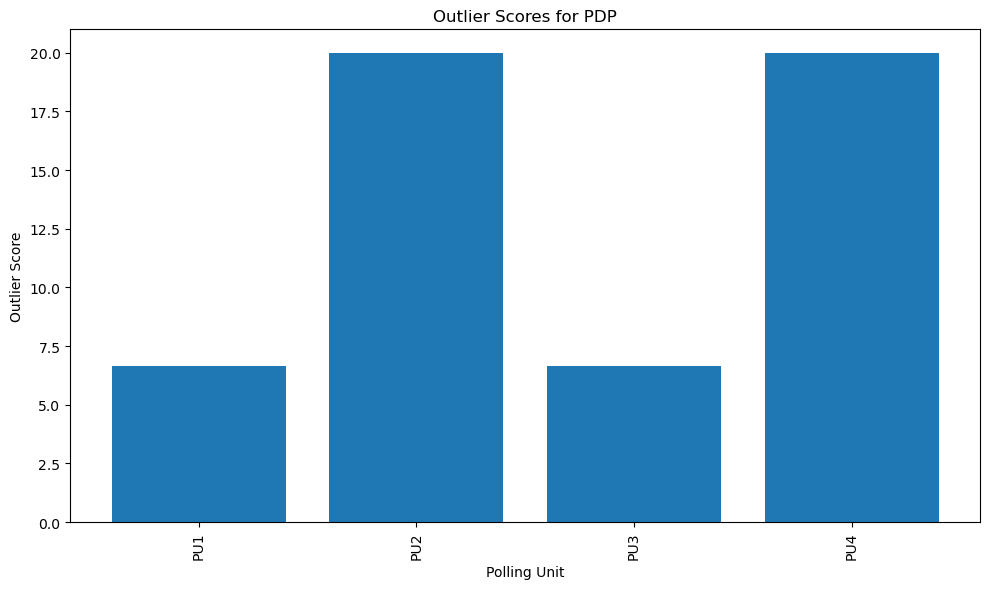

In [163]:
# Plotting the bar chart for PDP outlier scores
plt.figure(figsize=(10, 6))
plt.bar(df['PU-Name'], df['PDP_outlier_score'])
plt.xticks(rotation=90)
plt.xlabel('Polling Unit')
plt.ylabel('Outlier Score')
plt.title('Outlier Scores for PDP')
plt.tight_layout()
plt.show()


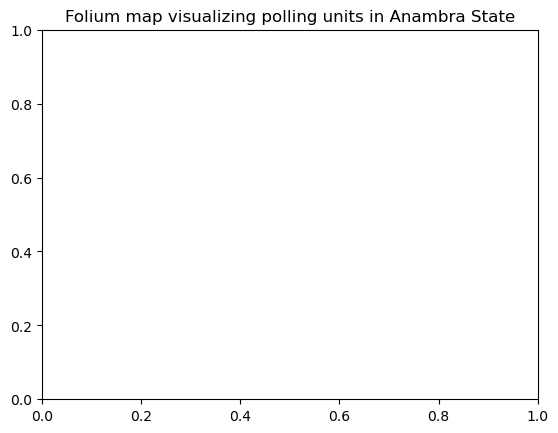

In [174]:
import folium

# Create a folium map to visualize polling units
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=12)


# Add markers for each polling unit
for index, row in df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Polling Unit: {row['PU-Name']}\nAPC Outlier Score: {row['APC_outlier_score']}\nLP Outlier Score: {row['LP_outlier_score']}\nPDP Outlier Score: {row['PDP_outlier_score']}\nNNPP Outlier Score: {row['NNPP_outlier_score']}"
    ).add_to(m)
plt.title('Folium map visualizing polling units in Anambra State')
# Save the map as an HTML file
m.save('polling_units_map.html')

# Display the map (this will work in Jupyter notebooks)
m

In [175]:
# Save the map as an HTML file
m.save('polling_units_map.html')

# Sort the dataset by outlier scores

In [176]:
sorted_outliers = outlier_scores.sort_values(by='outlier_score', ascending=False)
sorted_outliers.to_csv('sorted_outlier_scores.csv', index=False)
print(sorted_outliers.head())

                              PU-Name party  outlier_score
1178                      AMA-OKPOGBA   PDP      12.839118
9662              MODEBE MEMO P/S III   PDP      12.635357
11232                   UMUNEBO P/S I   APC      12.000627
7327                  UMUEZEAGU P/S I  NNPP      11.561981
13667  URBAN BOYS SECONDARY SCHOOL  I  NNPP      11.335126


# Identify top 3 outliers for each party

In [177]:
top_outliers = sorted_outliers.groupby('party').head(3)
print(top_outliers)

                              PU-Name party  outlier_score
1178                      AMA-OKPOGBA   PDP      12.839118
9662              MODEBE MEMO P/S III   PDP      12.635357
11232                   UMUNEBO P/S I   APC      12.000627
7327                  UMUEZEAGU P/S I  NNPP      11.561981
13667  URBAN BOYS SECONDARY SCHOOL  I  NNPP      11.335126
2903         COMMUNITY PRY. SCHOOL II  NNPP      11.192704
10078             OKAA AGBILIGBA HALL   PDP      11.176221
3872            NKWO AMENYI SQUARE II   APC      10.661366
10124                   EZENDU SQUARE   APC      10.320459
1177                      AMA-OKPOGBA    LP       6.340112
1169                     AMA-ENUGU II    LP       6.104308
4097                   G.T.C COMPOUND    LP       4.916632


In [178]:
# Explain why they are outliers
for index, row in top_outliers.iterrows():
    identifier = row[id_column]
    party = row['party']
    score = row['outlier_score']
    print(f"Unit {identifier} is an outlier for {party} with an outlier score of {score}.")

Unit AMA-OKPOGBA is an outlier for PDP with an outlier score of 12.839117745291805.
Unit MODEBE MEMO P/S III is an outlier for PDP with an outlier score of 12.635356713952119.
Unit UMUNEBO P/S I is an outlier for APC with an outlier score of 12.000627263241743.
Unit UMUEZEAGU P/S I is an outlier for NNPP with an outlier score of 11.56198143144458.
Unit URBAN BOYS SECONDARY SCHOOL  I is an outlier for NNPP with an outlier score of 11.335125970441581.
Unit COMMUNITY PRY. SCHOOL II is an outlier for NNPP with an outlier score of 11.192703643249285.
Unit OKAA AGBILIGBA HALL is an outlier for PDP with an outlier score of 11.176221160080914.
Unit NKWO AMENYI SQUARE II is an outlier for APC with an outlier score of 10.661366499754704.
Unit EZENDU SQUARE is an outlier for APC with an outlier score of 10.3204594420091.
Unit AMA-OKPOGBA is an outlier for LP with an outlier score of 6.340112420528137.
Unit AMA-ENUGU II is an outlier for LP with an outlier score of 6.104308343088281.
Unit G.T.C CO

In [179]:
# Save sorted outlier scores to a CSV file
sorted_outliers.to_csv('sorted_outlier_scores.csv', index=False)

In [180]:
# Identify top 3 outliers for each party
top_outliers = sorted_outliers.groupby('party').head(3)

# Save top outliers to a CSV file
top_outliers.to_csv('top_outliers.csv', index=False)

In [181]:
# Save the full dataset with calculated columns
df.to_csv('full_dataset_with_calculations.csv', index=False)

In [182]:
# Print statements to confirm saving
print("Sorted outlier scores saved to 'sorted_outlier_scores.csv'")
print("Top 3 outliers for each party saved to 'top_outliers.csv'")
print("Full dataset with calculations saved to 'full_dataset_with_calculations.csv'")

Sorted outlier scores saved to 'sorted_outlier_scores.csv'
Top 3 outliers for each party saved to 'top_outliers.csv'
Full dataset with calculations saved to 'full_dataset_with_calculations.csv'
